<a href="https://colab.research.google.com/github/RobInLabUJI/RobotColab/blob/main/Notebooks/MobileRobots/121_LidarTurtleBot3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c0/LIDAR-scanned-SICK-LMS-animation.gif/220px-LIDAR-scanned-SICK-LMS-animation.gif" align="right">

# Laser rangefinder (Lidar)

This sensor determines the distance to an object with a laser by measuring the time for the reflected light to return to the receiver.

*Lidar* is an acronym of "light detection and ranging" or "laser imaging, detection, and ranging". Modern lidars can deliver 3D scans bust most popular devices used in robotics work in a plane.

As shown in the figure, a [basic lidar system](https://en.wikipedia.org/wiki/Lidar#Technology) involves a laser range finder reflected by a rotating mirror (top). The laser is scanned around the scene being digitized, in one or two dimensions (middle), gathering distance measurements at specified angle intervals (bottom).

The working principle of lidars and ultrasonic sensors is the same, but using light signals instead of sound has several advantages:
* faster measurements
* better precision
* better accuracy

Nevertheless, lidars might not able to detect transparent or dark-colored objects whereas ultrasonic sensors are not affected.

<img src="https://emanual.robotis.com/assets/images/platform/turtlebot3/appendix_lds/lds.png" align="right" width="50%">

## LDS-01

The [LDS-01](https://emanual.robotis.com/docs/en/platform/turtlebot3/appendix_lds_01/) is a small lidar suitable for the TurtleBot 3. It has the following specifications:
* `field of view`: 360º
* `range`: 120 ~ 3,500 [mm]
* `resolution`: 1º

Measurements are read with the function `getRange` which returns a list of distances (or `inf` for values out of range). The first value corresponds to the left of the robot.

In [1]:
from TurtleBot3.Controllers import TurtleBot3Robot, sleep
robot = TurtleBot3Robot()

In [2]:
d = robot.getScan()

The distance for a specific angle (between 0 and 359) can be obtained with:



In [3]:
angle = 120
d[angle]

0.48100000619888306

And the minimum value within a cone specified by two angles is:

In [5]:
cone = (105, 135)
min(d[cone[0]:cone[1]])

0.4779999852180481

In [6]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

In [8]:
a = np.linspace(0,360,360,False)*np.pi/180
c = np.cos(a)
s = np.sin(a)

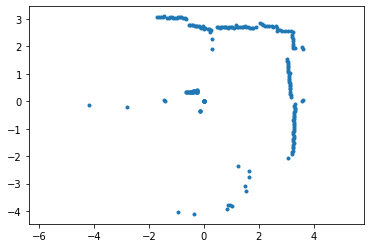

In [10]:
d = robot.getScan()
plt.plot(np.multiply(d,c),np.multiply(d,s),'.');
plt.axis('equal');

# Wandering

Write a version of the wandering algorithm for the TurtleBot3 with the lidar sensor.